#Problem Statement
 **Detecting fraud for transactions in a payment gateway.

 **IndAvenue has started gaining traction due to its extremely low processing fees for handling online vendors’ digital payments.

 **This strategy has led to very low costs of acquiring new vendors.
  
  **is_fruad is the target varible in tha data

In [ ]:
#importing libraries
import pandas as pd
import numpy as np

In [ ]:
#reading the data
train_data=pd.read_csv("/content/train_data-1611220940820.csv",na_values='?' ',')


In [ ]:
train_data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


#Understand the data

In [ ]:
rows,cols=train_data.shape
print(f'There are {rows} Rows and {cols} Columns')

There are 76529 Rows and 11 Columns


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        76529 non-null  int64  
 1   user_id                   76529 non-null  int64  
 2   payment_method            76529 non-null  object 
 3   partner_id                76529 non-null  int64  
 4   partner_category          76529 non-null  object 
 5   country                   76529 non-null  object 
 6   device_type               76529 non-null  object 
 7   money_transacted          76529 non-null  float64
 8   transaction_initiation    76529 non-null  object 
 9   partner_pricing_category  76529 non-null  int64  
 10  is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 6.4+ MB


In [ ]:
train_data.columns

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category', 'is_fraud'],
      dtype='object')

In [ ]:
train_data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
is_fraud                      int64
dtype: object

In [ ]:
train_data.describe()

,transaction_number,user_id,partner_id,money_transacted,partner_pricing_category,is_fraud
count,7.652900e+04,7.652900e+04,76529.000000,76529.000000,76529.000000,76529.000000
mean,6.940200e+14,1.247483e+07,58497.189105,132.724348,2.255707,0.002012
std,7.867885e+14,1.205878e+07,36740.216787,2350.110900,0.732174,0.044814
min,8.000000e+00,1.000000e+00,7889.000000,-20000.000000,0.000000,0.000000
25%,4.387866e+13,3.515625e+06,23667.000000,-1.000000,2.000000,0.000000
50%,3.452540e+14,9.753129e+06,47334.000000,20.000000,2.000000,0.000000
75%,1.173440e+15,1.788444e+07,78890.000000,52.000000,2.000000,0.000000
max,2.784238e+15,5.592048e+07,213003.000000,197217.760000,4.000000,1.000000


In [ ]:
#finding null values
train_data.isnull().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
dtype: int64

In [ ]:
#unique values in target variable
train_data['is_fraud'].value_counts()

0    76375
1      154
Name: is_fraud, dtype: int64

In [ ]:
train_data['partner_id'].nunique()

23

In [ ]:
train_data.value_counts('partner_id')

partner_id
47334     26105
23667     19526
78890     12273
118335     9546
7889       2317
31556      1892
165669     1216
86779      1121
149891      767
110446      640
102557      231
15778       189
157780      165
63112       159
189336      146
173558       89
55223        75
213003       25
39445        19
71001        15
126224       10
94668         2
181447        1
dtype: int64

#EDA(Exploratory Data Analysis)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

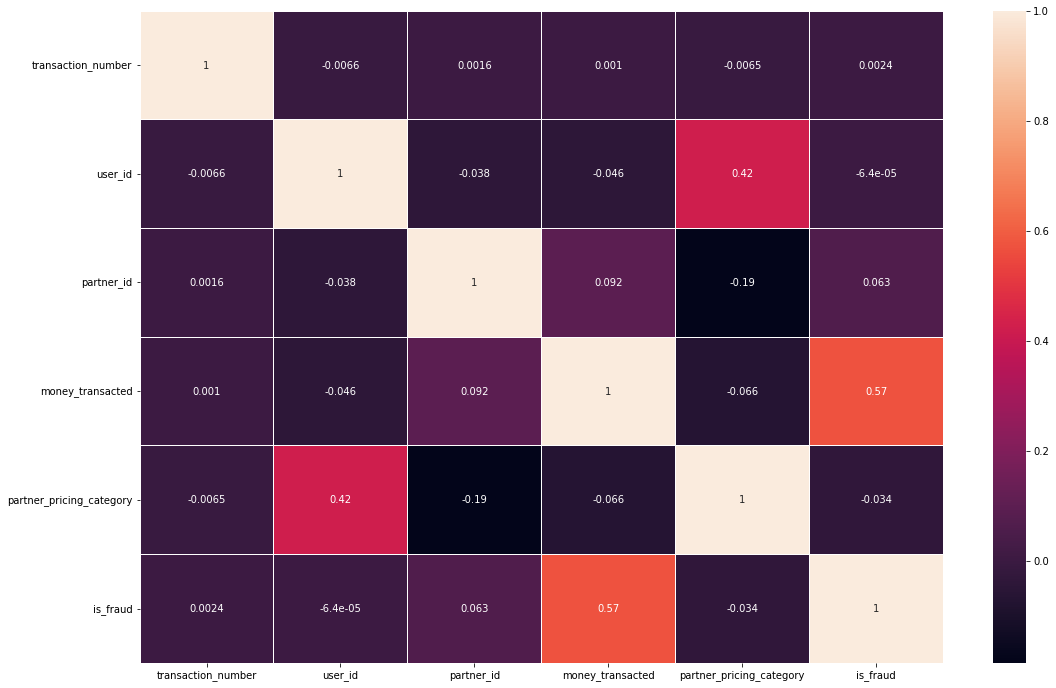

In [ ]:
#Heat map
plt.figure(figsize = (18, 12))
sns.heatmap(data =train_data.corr(), annot = True, fmt ='.2g', linewidth = 1)
plt.show()

In [ ]:
train_data_f=train_data[train_data['is_fraud']==1]
train_data_nf=train_data[train_data['is_fraud']==0]

In [ ]:
train_data_f.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
196,631960043718375,1695204,visa_master_credit_cards,118335,cat_1,IND_INR,other_pcs,40000.0,2017-01-18 15:09:59+00:00,2,1
571,2425548625856,7054336,visa_master_credit_cards,118335,cat_1,IND_INR,windows_pcs,6000.0,2017-01-24 00:44:25+00:00,2,1
1267,641842338376,19829209,other_debit_cards,118335,cat_1,IND_INR,other_pcs,10000.0,2016-12-04 12:22:20+00:00,0,1
1420,298707250627423,19829209,other_debit_cards,118335,cat_1,IND_INR,other_pcs,60000.0,2016-12-04 12:20:07+00:00,0,1
1811,1165348588684337,25542916,visa_master_debit_cards,23667,cat_2,IND_INR,other_pcs,10000.0,2016-12-28 08:17:21+00:00,4,1


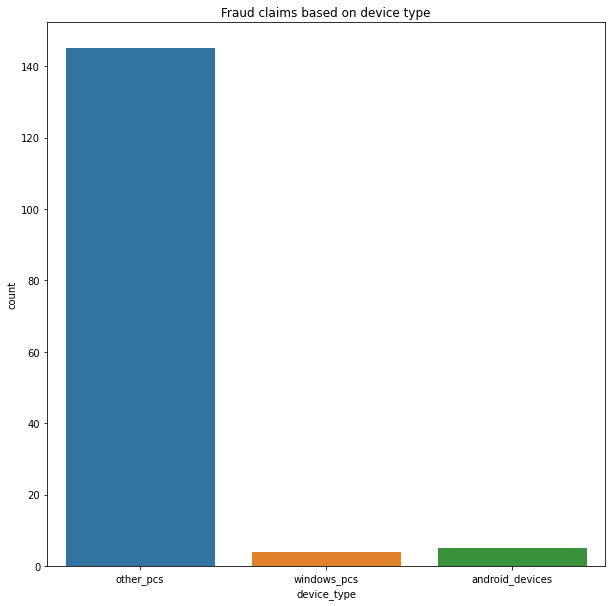

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x = train_data_f.device_type, data = train_data_f)
plt.title("Fraud claims based on device type")
plt.show()

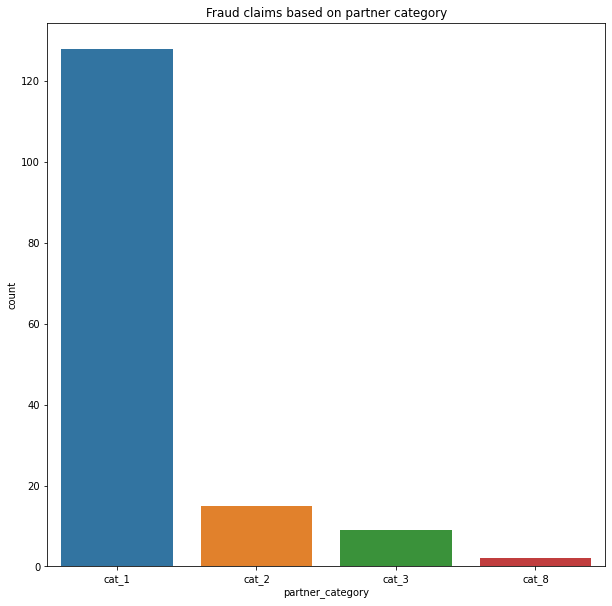

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x = train_data_f.partner_category, data = train_data_f)
plt.title("Fraud claims based on partner category")
plt.show()

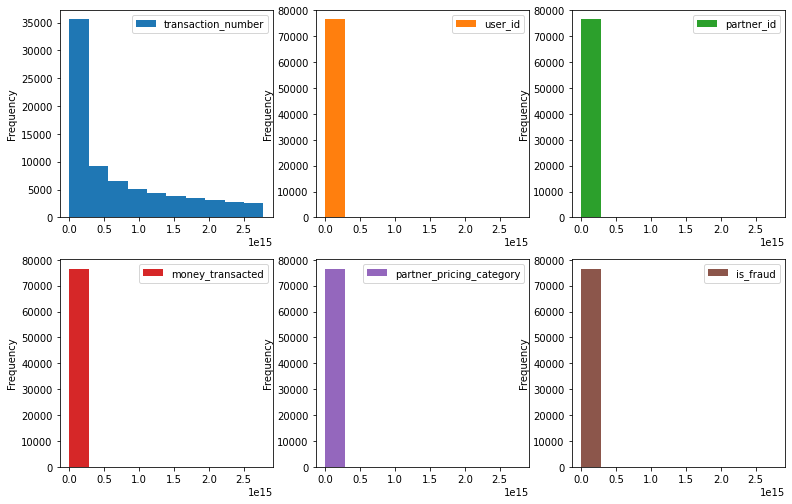

In [ ]:
from matplotlib.pyplot import subplots
train_data.plot(kind='hist',subplots=True,sharex=False,sharey=False,layout=(3,3),figsize=(13,13))
plt.show()

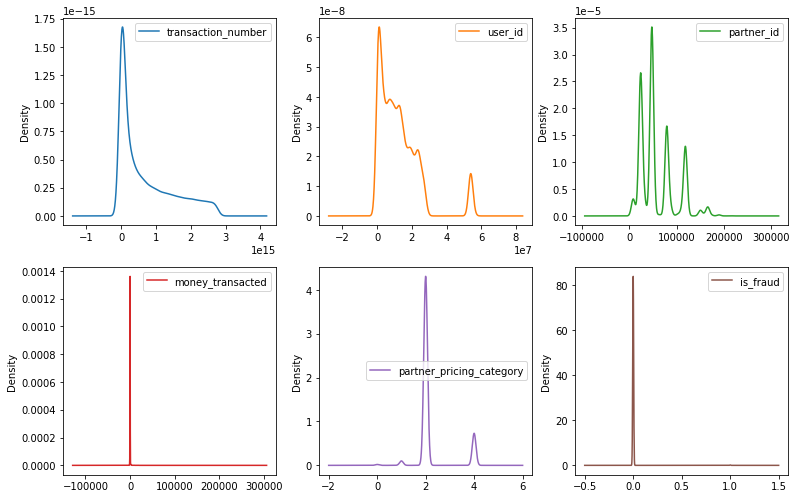

In [ ]:
train_data.plot(kind='density',subplots=True,sharex=False,sharey=False,layout=(3,3),figsize=(13,13))
plt.show()

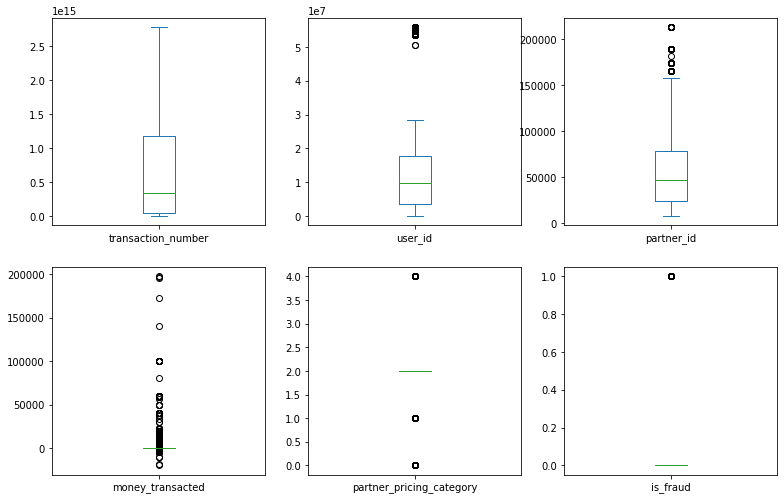

In [ ]:
train_data.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(3,3),figsize=(13,13))
plt.show()

#Feature engineering
 
 **Coverting transaction_initiation into date & time data type

In [ ]:
train_data['transaction_initiation'] = pd.to_datetime(train_data['transaction_initiation'])
train_data['transaction_initiation'].dtypes

datetime64[ns, UTC]

In [ ]:
train_data['year'] = train_data['transaction_initiation'].dt.year
train_data['month'] = train_data['transaction_initiation'].dt.month
train_data['day'] = train_data['transaction_initiation'].dt.day
train_data['time'] = train_data['transaction_initiation'].dt.time
train_data.drop(columns='transaction_initiation', axis='1', inplace=True)

In [ ]:
train_data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category,is_fraud,year,month,day,time
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2,0,2016,11,15,19:16:12
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2,0,2017,1,11,09:25:33
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2,0,2016,12,7,07:58:09
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2,0,2017,1,11,16:15:44
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2,0,2016,11,16,17:04:42


In [ ]:
train_data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
partner_pricing_category      int64
is_fraud                      int64
year                          int64
month                         int64
day                           int64
time                         object
dtype: object

In [ ]:
train_data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category,is_fraud,year,month,day,time
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2,0,2016,11,15,19:16:12
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2,0,2017,1,11,09:25:33
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2,0,2016,12,7,07:58:09
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2,0,2017,1,11,16:15:44
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2,0,2016,11,16,17:04:42


In [ ]:
train_data=train_data.drop("time",axis=1)
train_data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category,is_fraud,year,month,day
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2,0,2016,11,15
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2,0,2017,1,11
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2,0,2016,12,7
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2,0,2017,1,11
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2,0,2016,11,16


In [ ]:
train_data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
partner_pricing_category      int64
is_fraud                      int64
year                          int64
month                         int64
day                           int64
dtype: object

#preprocessing

In [ ]:
cat_attr=(["payment_method","partner_category","device_type"])
train_data[cat_attr]=train_data[cat_attr].astype('category')

In [ ]:
train_data.dtypes

transaction_number             int64
user_id                        int64
payment_method              category
partner_id                     int64
partner_category            category
country                       object
device_type                 category
money_transacted             float64
partner_pricing_category       int64
is_fraud                       int64
year                           int64
month                          int64
day                            int64
dtype: object

In [ ]:
train_data=train_data.drop(['transaction_number','country'],axis=1)
train_data.head()

,user_id,payment_method,partner_id,partner_category,device_type,money_transacted,partner_pricing_category,is_fraud,year,month,day
0,17539344,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-5.0,2,0,2016,11,15
1,24710841,e_wallet_payments,78890,cat_2,other_pcs,100.0,2,0,2017,1,11
2,24265476,e_wallet_payments,78890,cat_2,other_pcs,50.0,2,0,2016,12,7
3,10240000,other_debit_cards,102557,cat_3,other_pcs,1000.0,2,0,2017,1,11
4,5880625,other_debit_cards,118335,cat_1,other_pcs,200.0,2,0,2016,11,16


#Encoding

In [ ]:
train_data=pd.get_dummies(train_data)

In [ ]:
train_data.columns

Index(['user_id', 'partner_id', 'money_transacted', 'partner_pricing_category',
       'is_fraud', 'year', 'month', 'day', 'payment_method_e_wallet_payments',
       'payment_method_other_debit_cards',
       'payment_method_sbi_atm_cum_debit_card',
       'payment_method_unified_payments_interface',
       'payment_method_visa_master_credit_cards',
       'payment_method_visa_master_debit_cards', 'partner_category_cat_1',
       'partner_category_cat_2', 'partner_category_cat_3',
       'partner_category_cat_4', 'partner_category_cat_5',
       'partner_category_cat_6', 'partner_category_cat_7',
       'partner_category_cat_8', 'partner_category_cat_9',
       'device_type_android_devices', 'device_type_ios_devices',
       'device_type_other_pcs', 'device_type_windows_pcs'],
      dtype='object')

In [ ]:
train_data.shape

(76529, 27)

# Spliting the data

In [ ]:
from sklearn.model_selection import train_test_split
y=train_data["is_fraud"]
x=train_data.drop("is_fraud",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(61223, 26)
(15306, 26)
(61223,)
(15306,)


## Standardize the data

In [ ]:
num_art=x_train.select_dtypes(['int64','float64']).columns
num_art_test=x_test.select_dtypes(['int64','float64']).columns
print(num_art)
print(num_art_test)

Index(['user_id', 'partner_id', 'money_transacted', 'partner_pricing_category',
       'year', 'month', 'day'],
      dtype='object')
Index(['user_id', 'partner_id', 'money_transacted', 'partner_pricing_category',
       'year', 'month', 'day'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
x_train[num_art]=scaler.fit_transform(x_train[num_art])
x_test[num_art_test]=scaler.fit_transform(x_test[num_art])

In [ ]:
print(x_train[num_art].shape)
print(x_test[num_art_test].shape)

(61223, 7)
(15306, 7)


#Building models

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [ ]:
import statistics as stat

In [ ]:
model1=KNeighborsClassifier()
model2=LogisticRegression()
model3=DecisionTreeClassifier()
model4=RandomForestClassifier()
model5=XGBClassifier()

In [ ]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
model5.fit(x_train,y_train)

XGBClassifier()

In [ ]:
train_prds1=model1.predict(x_train)
train_prds2=model2.predict(x_train)
train_prds3=model3.predict(x_train)
train_prds4=model4.predict(x_train)
train_prds5=model5.predict(x_train)

In [ ]:
test_prds1=model1.predict(x_test)
test_prds2=model2.predict(x_test)
test_prds3=model3.predict(x_test)
test_prds4=model4.predict(x_test)
test_prds5=model5.predict(x_test)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
print('========Train=======')
print(f"Confusion Matrix of KNN \n{confusion_matrix(y_train, train_prds1)}")
print('========Train=======')
print(f"Confusion Matrix of LR \n{confusion_matrix(y_train, train_prds2)}")
print('========Train=======')
print(f"Confusion Matrix of DT \n{confusion_matrix(y_train, train_prds3)}")
print('========Train=======')
print(f"Confusion Matrix of RFC \n{confusion_matrix(y_train, train_prds4)}")
print('========Train=======')
print(f"Confusion Matrix of XGB \n{confusion_matrix(y_train, train_prds5)}")

========Train=======
Confusion Matrix of KNN 
[[61103     3]
 [   25    92]]
========Train=======
Confusion Matrix of LR 
[[61087    19]
 [   77    40]]
========Train=======
Confusion Matrix of DT 
[[61106     0]
 [    3   114]]
========Train=======
Confusion Matrix of RFC 
[[61104     2]
 [    1   116]]
========Train=======
Confusion Matrix of XGB 
[[61104     2]
 [   15   102]]


In [ ]:
print('========Test=======')
print(f"Confusion Matrix of KNN \n{confusion_matrix(y_test, test_prds1)}")
print('========Test=======')
print(f"Confusion Matrix of LR \n{confusion_matrix(y_test, test_prds2)}")
print('========Test=======')
print(f"Confusion Matrix of DT \n{confusion_matrix(y_test, test_prds3)}")
print('========Test=======')
print(f"Confusion Matrix of RFC \n{confusion_matrix(y_test, test_prds4)}")
print('========Test=======')
print(f"Confusion Matrix of XGB \n{confusion_matrix(y_test, test_prds5)}")

========Test=======
Confusion Matrix of KNN 
[[15267     2]
 [    8    29]]
========Test=======
Confusion Matrix of LR 
[[15263     6]
 [   28     9]]
========Test=======
Confusion Matrix of DT 
[[15262     7]
 [    6    31]]
========Test=======
Confusion Matrix of RFC 
[[15265     4]
 [    9    28]]
========Test=======
Confusion Matrix of XGB 
[[15268     1]
 [    7    30]]


In [ ]:
print("train f1_score of KNeighborsClassifier :",f1_score (y_train,train_prds1,))
print("train f1_score of LogisticRegression :", f1_score(y_train,train_prds2))
print("train f1_score of DecisionTreeClassifier :" ,f1_score(y_train,train_prds3))
print("train f1_score of RandomForestClassifier :" ,f1_score(y_train,train_prds4))
print("train f1_score of XGBClassifier :" ,f1_score(y_train,train_prds5))

train f1_score of KNeighborsClassifier : 0.8679245283018867
train f1_score of LogisticRegression : 0.4545454545454545
train f1_score of DecisionTreeClassifier : 0.9870129870129869
train f1_score of RandomForestClassifier : 0.9872340425531915
train f1_score of XGBClassifier : 0.9230769230769229


In [ ]:
print("test f1_score of KNeighborsClassifier :" ,f1_score(y_test,test_prds1))
print("test f1_score of LogisticRegression :" ,f1_score(y_test,test_prds2))
print("test f1_score of DecisionTreeClassifier :" ,f1_score(y_test,test_prds3))
print("test f1_score of RandomForestClassifier :" ,f1_score(y_test,test_prds4))
print("train f1_score of XGBClassifier :" ,f1_score(y_test,test_prds5))

test f1_score of KNeighborsClassifier : 0.8529411764705881
test f1_score of LogisticRegression : 0.34615384615384615
test f1_score of DecisionTreeClassifier : 0.8266666666666665
test f1_score of RandomForestClassifier : 0.8115942028985507
train f1_score of XGBClassifier : 0.8823529411764706


#Test Dataset


In [ ]:
test_data=pd.read_csv("/content/test_data-1611220982388.csv")

In [ ]:
test_data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-12-28 14:44:37+00:00,2
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-14 17:49:48+00:00,2
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-21 10:18:11+00:00,2
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,2017-01-16 13:25:10+00:00,1
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2017-02-09 12:47:28+00:00,2


In [ ]:
test_data.columns

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category'],
      dtype='object')

In [ ]:
test_data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
dtype: object

In [ ]:
test_data.describe()

,transaction_number,user_id,partner_id,money_transacted,partner_pricing_category
count,1.913300e+04,1.913300e+04,19133.000000,19133.000000,19133.000000
mean,7.037622e+14,1.261609e+07,58656.424084,140.886995,2.257043
std,7.946458e+14,1.228365e+07,36692.507399,2883.975048,0.735934
min,1.000000e+00,3.600000e+01,7889.000000,-20000.000000,0.000000
25%,4.313645e+13,3.515625e+06,23667.000000,-1.000000,2.000000
50%,3.585617e+14,9.922500e+06,47334.000000,20.000000,2.000000
75%,1.184018e+15,1.796064e+07,78890.000000,60.000000,2.000000
max,2.783822e+15,5.593544e+07,213003.000000,197600.000000,4.000000


In [ ]:
test_data.isnull().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
dtype: int64

#Feature engineering

In [ ]:
test_data['transaction_initiation'] = pd.to_datetime(test_data['transaction_initiation'])
test_data['transaction_initiation'].dtypes

datetime64[ns, UTC]

In [ ]:
test_data['year'] = test_data['transaction_initiation'].dt.year
test_data['month'] = test_data['transaction_initiation'].dt.month
test_data['day'] = test_data['transaction_initiation'].dt.day
test_data['time'] = test_data['transaction_initiation'].dt.time
test_data.drop(columns='transaction_initiation', axis='1', inplace=True)

In [ ]:
test_data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category,year,month,day,time
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2,2016,12,28,14:44:37
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2,2016,12,14,17:49:48
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2,2017,1,21,10:18:11
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,1,2017,1,16,13:25:10
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2,2017,2,9,12:47:28


In [ ]:
test_data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
partner_pricing_category      int64
year                          int64
month                         int64
day                           int64
time                         object
dtype: object

In [ ]:
test_data=test_data.drop("time",axis=1)
test_data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category,year,month,day
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2,2016,12,28
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2,2016,12,14
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2,2017,1,21
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,1,2017,1,16
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2,2017,2,9


#Preprocessing

In [ ]:
cat_attr=(["payment_method","partner_category","device_type"])
test_data[cat_attr]=test_data[cat_attr].astype('category')

In [ ]:
test_data.dtypes

transaction_number             int64
user_id                        int64
payment_method              category
partner_id                     int64
partner_category            category
country                       object
device_type                 category
money_transacted             float64
partner_pricing_category       int64
year                           int64
month                          int64
day                            int64
dtype: object

In [ ]:
test_data=test_data.drop(['transaction_number','country'],axis=1)
test_data.head()

,user_id,payment_method,partner_id,partner_category,device_type,money_transacted,partner_pricing_category,year,month,day
0,3802500,visa_master_debit_cards,118335,cat_1,other_pcs,200.0,2,2016,12,28
1,200704,e_wallet_payments,23667,cat_2,other_pcs,20.0,2,2016,12,14
2,25150225,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-100.0,2,2017,1,21
3,21827584,visa_master_credit_cards,78890,cat_2,other_pcs,200.0,1,2017,1,16
4,576081,e_wallet_payments,23667,cat_2,other_pcs,100.0,2,2017,2,9


#Encoding

In [ ]:
test_data=pd.get_dummies(test_data)

In [ ]:
test_data.columns

Index(['user_id', 'partner_id', 'money_transacted', 'partner_pricing_category',
       'year', 'month', 'day', 'payment_method_e_wallet_payments',
       'payment_method_other_debit_cards',
       'payment_method_sbi_atm_cum_debit_card',
       'payment_method_unified_payments_interface',
       'payment_method_visa_master_credit_cards',
       'payment_method_visa_master_debit_cards', 'partner_category_cat_1',
       'partner_category_cat_2', 'partner_category_cat_3',
       'partner_category_cat_4', 'partner_category_cat_5',
       'partner_category_cat_6', 'partner_category_cat_7',
       'partner_category_cat_8', 'device_type_android_devices',
       'device_type_ios_devices', 'device_type_other_pcs',
       'device_type_windows_pcs'],
      dtype='object')

In [ ]:
test_data.shape

(19133, 25)

In [ ]:
train_data.head()

,user_id,partner_id,money_transacted,partner_pricing_category,is_fraud,year,month,day,payment_method_e_wallet_payments,payment_method_other_debit_cards,...,partner_category_cat_4,partner_category_cat_5,partner_category_cat_6,partner_category_cat_7,partner_category_cat_8,partner_category_cat_9,device_type_android_devices,device_type_ios_devices,device_type_other_pcs,device_type_windows_pcs
0,17539344,47334,-5.0,2,0,2016,11,15,0,0,...,0,0,0,0,0,0,1,0,0,0
1,24710841,78890,100.0,2,0,2017,1,11,1,0,...,0,0,0,0,0,0,0,0,1,0
2,24265476,78890,50.0,2,0,2016,12,7,1,0,...,0,0,0,0,0,0,0,0,1,0
3,10240000,102557,1000.0,2,0,2017,1,11,0,1,...,0,0,0,0,0,0,0,0,1,0
4,5880625,118335,200.0,2,0,2016,11,16,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
test_data.head()

,user_id,partner_id,money_transacted,partner_pricing_category,year,month,day,payment_method_e_wallet_payments,payment_method_other_debit_cards,payment_method_sbi_atm_cum_debit_card,...,partner_category_cat_3,partner_category_cat_4,partner_category_cat_5,partner_category_cat_6,partner_category_cat_7,partner_category_cat_8,device_type_android_devices,device_type_ios_devices,device_type_other_pcs,device_type_windows_pcs
0,3802500,118335,200.0,2,2016,12,28,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,200704,23667,20.0,2,2016,12,14,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,25150225,47334,-100.0,2,2017,1,21,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,21827584,78890,200.0,1,2017,1,16,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,576081,23667,100.0,2,2017,2,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0


#Merging two datasets 

In [ ]:
result_data=pd.merge(train_data,test_data)

In [ ]:
result_data.head()

,user_id,partner_id,money_transacted,partner_pricing_category,is_fraud,year,month,day,payment_method_e_wallet_payments,payment_method_other_debit_cards,...,partner_category_cat_4,partner_category_cat_5,partner_category_cat_6,partner_category_cat_7,partner_category_cat_8,partner_category_cat_9,device_type_android_devices,device_type_ios_devices,device_type_other_pcs,device_type_windows_pcs
0,5880625,118335,200.0,2,0,2016,11,16,0,1,...,0,0,0,0,0,0,0,0,1,0
1,5880625,118335,200.0,2,0,2016,11,16,0,1,...,0,0,0,0,0,0,0,0,1,0
2,10660225,47334,-0.8,2,0,2016,12,28,0,0,...,0,0,0,0,0,0,1,0,0,0
3,10660225,47334,-0.8,2,0,2016,12,28,0,0,...,0,0,0,0,0,0,1,0,0,0
4,10660225,47334,-0.8,2,0,2016,12,28,0,0,...,0,0,0,0,0,0,1,0,0,0
